# Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
!git clone https://github.com/aniketyadavcca/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Counting objects: 100% (2301/2301), done.
remote: Compressing objects: 100% (2300/2300), done.
remote: Total 2301 (delta 0), reused 2299 (delta 0), pack-reused 0
Receiving objects: 100% (2301/2301), 1.31 GiB | 31.07 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir

import os
main_dir="/content/datasets/Data"

#set the path to the train dir
train_dir=os.path.join(main_dir,'train')

#set the path to the test dir
test_dir=os.path.join(main_dir,'test')


#directory with the training covid images
train_covid_dir=os.path.join(train_dir,'COVID19' )

#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'NORMAL' )

#directory with the testing covid images
test_covid_dir=os.path.join(test_dir, 'COVID19')


#directory with the testing normal images
test_normal_dir=os.path.join(test_dir, 'NORMAL')


In [4]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:10])


test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(336).jpg', 'COVID19(179).jpg', 'COVID19(95).jpg', 'COVID19(381).jpg', 'COVID-19 (295).jpg', 'COVID19(520).jpg', 'COVID-19 (11).jpeg', 'COVID19(154).jpg', 'COVID19(405).jpg', 'COVID19(528).jpg']
['NORMAL(801).jpg', 'NORMAL(53).jpg', 'NORMAL(272).jpg', 'NORMAL(1079).jpg', 'NORMAL(358).jpg', 'NORMAL(1495).jpg', 'NORMAL(505).jpg', 'NORMAL(786).jpg', 'NORMAL(452).jpg', 'NORMAL(1082).jpg']
['COVID19(408).jpg', 'COVID-19 (570).jpg', 'COVID-19 (864).jpg', 'COVID-19 (461).jpg', 'COVID19(410).jpg', 'COVID-19 (475).jpg', 'COVID-19 (767).jpg', 'COVID19(358).jpg', 'COVID19(129).jpg', 'COVID19(483).jpg']
['NORMAL(760).jpg', 'NORMAL(291).jpg', 'NORMAL(8).jpg', 'NORMAL(181).jpg', 'NORMAL(1396).jpg', 'NORMAL(1037).jpg', 'NORMAL(1386).jpg', 'NORMAL(140).jpg', 'NORMAL(1569).jpg', 'NORMAL(142).jpg']


In [5]:
#print the total no of images present in each dir
print("Total number of images present in the training set:", len(train_covid_names+train_normal_names))

Total number of images present in the training set: 1811


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(336).jpg', '/content/datasets/Data/train/COVID19/COVID19(179).jpg', '/content/datasets/Data/train/COVID19/COVID19(95).jpg', '/content/datasets/Data/train/COVID19/COVID19(381).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (295).jpg', '/content/datasets/Data/train/COVID19/COVID19(520).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (11).jpeg', '/content/datasets/Data/train/COVID19/COVID19(154).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(801).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(53).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(272).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1079).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(358).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1495).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(505).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(786).jpg']


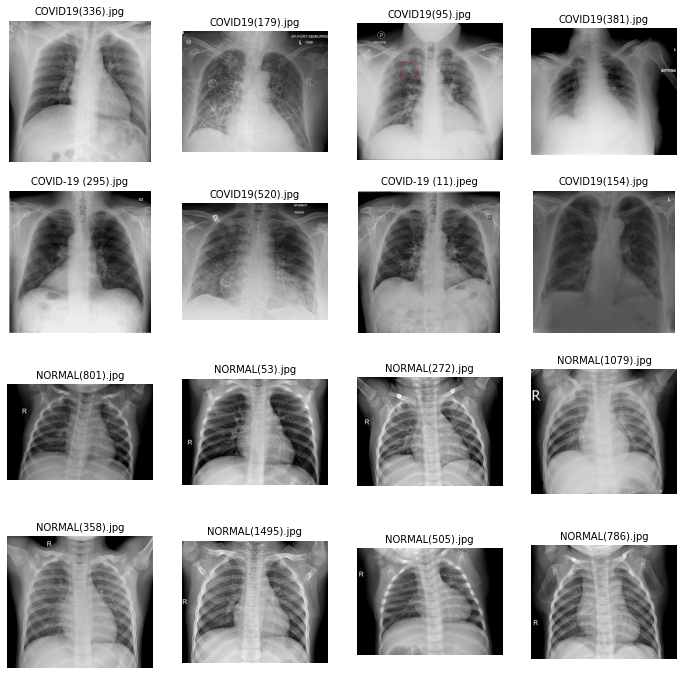

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(train_covid_dir, filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir, filename)for filename in train_normal_names[0:8]]

#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list

merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data =img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

# Data Preprocessing & Augmentation


In [7]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,
                              validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

train_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='training',
                                               batch_size=32,
                                               class_mode='binary')

validation_generator=dgen_train.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               subset='validation',
                                               batch_size=32,
                                               class_mode='binary')
test_generator=dgen_test.flow_from_directory(test_dir,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary')
                                            
                        

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# Build Convolutional Neural Network Model

In [10]:
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape

model.add(Conv2D(32,(5,5), padding='SAME',activation='relu', input_shape=(150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train the Model

In [11]:
#compile the model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
#train the model
history=model.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 84s 1s/step - loss: 1.0577 - accuracy: 0.7778 - val_loss: 0.3520 - val_accuracy: 0.8757
Epoch 2/30
46/46 [==============================] - 55s 1s/step - loss: 0.2060 - accuracy: 0.9241 - val_loss: 0.1485 - val_accuracy: 0.9558
Epoch 3/30
46/46 [==============================] - 54s 1s/step - loss: 0.1611 - accuracy: 0.9462 - val_loss: 0.1719 - val_accuracy: 0.9669
Epoch 4/30
46/46 [==============================] - 56s 1s/step - loss: 0.1480 - accuracy: 0.9469 - val_loss: 0.1545 - val_accuracy: 0.9586
Epoch 5/30
46/46 [==============================] - 56s 1s/step - loss: 0.1384 - accuracy: 0.9503 - val_loss: 0.1804 - val_accuracy: 0.9530
Epoch 6/30
46/46 [==============================] - 55s 1s/step - loss: 0.1569 - accuracy: 0.9462 - val_loss: 0.1218 - val_accuracy: 0.9530
Epoch 7/30
46/46 [==============================] - 54s 1s/step - loss: 0.1212 - accuracy: 0.9545 - val_loss: 0.1450 - val_accuracy: 0.9448
Epoch 8/30
46/46 [==

# Performance Evaluation

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

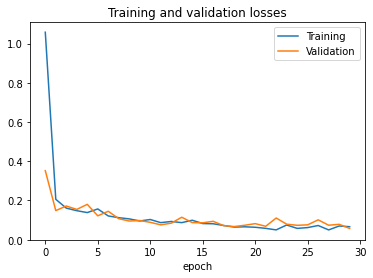

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

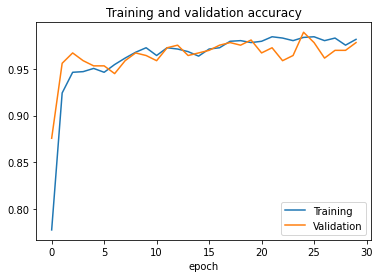

In [15]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')


In [16]:
# get the test acuarcy and loss
test_loss, test_acc=model.evaluate(test_generator)
print('Test loss: {} test acc: {}' .format(test_loss, test_acc))

16/16 [==============================] - 12s 754ms/step - loss: 0.0912 - accuracy: 0.9649
Test loss: 0.0912109911441803 test acc: 0.9648760557174683


# Prediction On New Data

Saving normal1.jpg to normal1 (1).jpg
Report is normal


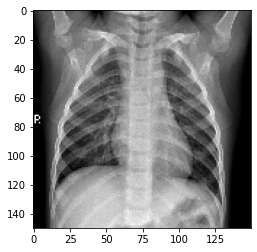

In [26]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  img=image.load_img(img_path, target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images, axis=0)
  prediction=model.predict(images)
  # print(filename)
  plt.imshow(img)
  if prediction ==0:
    print('Covid detected')
  else:
    print('Report is normal')